# Predictive Modeling and Visualizations

 By Chuan Yong (Bill) Guo

The purpose of this file is to act as a template to test various machine learning models and document possible options and parameters that can be manipulated for each model in a concise and easy to follow format. Each line of code is attached to a '' symbol in front of it to prevent the code from running as multiple codes within a code cell because some codes may not be allowed to run together. In order to run the line of code, remove the '' symbol on front of the desired code line. The purpose of this setup package multiple concepts within a single code cell for easy access and understanding, without having the cell run into errors trying to run multiple contradictory codes.

In [1]:
#This cell is used to import modules that will be useful for model prediction. 

import pandas as pd #Pandas is the base Python library used to manuipulate datasets, typically this will always be useful. 
import numpy as np #Numpy is mainly used to allow for mathematical manipulations of datasets, typically this will always be useful.


In [20]:
#Importing datasets
df_original = pd.read_csv('Datasets/diabetes.csv')#usecols=['Job Title','Avg Salary(K)','Job Description','Location']) #Used to read .csv files. usecols parameter selects for specific columns to be loaded. 
#df_original2 = pd.read_excel('Datasets/US_Population_2020_2021.xlsx', sheet_name='2021',header=None) #usecols=['Geographic Area','Population']) #Used to read .xls files, sheet_name can be used to select for different sheets by using index number or string name.
#df1 = df_original #Good idea to create a new object that is a copy of the original dataset so that the original dataset isn't directly manipulated
#df2 = df_original2
#df_original.head() #Initial dataset without any manipulation.
df = df_original
df_pima=df

In [21]:
columns = ['Glucose', 'Insulin']
for i in columns:
    df_pima[i] = df_pima[i].map(lambda x: x if x!=0 else None)
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,19.355807,15.952218,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Basic Column and Row Manipulation

In [7]:
###'''Data Cleaning'''

###'''Declaring and resetting columns as index'''
#df.set_index('Job Title',inplace=True)
#df.reset_index(inplace=True)

###'''Adding a column based on other columns'''
#df['New column'] = (df['Lower Salary'] + df['Upper Salary'])/2 #Mathematical manipulation

#Method for adding a column based on condition of existing column, can edit conditions to suit needs.
    #def output_element(input_element): 
        #if input_element < 50:
            #return 'Low'
        #elif input_element >= 50 and input_element < 80:
            #return 'Medium'
        #else:
            #return 'High'
    #df['New Column'] = df['Lower Salary'].apply(output_element)
    #df

###'''Removing columns'''
#df.drop(columns={'Rating','Location'},inplace=True) #By column name.
#df.drop(df.iloc[:, 1:3],axis=1,inplace=True) #By column index with range of columns (axis=1 indicates columns)


###'''Changing column names'''
#names=['a','b']
#df2.columns = names


df2.rename(columns={df2.columns[0]: 'newNamexX', 'b': 'newName2'}, inplace=True)
df2
###'''Viewing multiple columns'''
#df[['New column','Job Title']] #By column name
#df.loc[:,'Rating':'Location'] #By column name(another format)
#df.iloc[:,[1,2,5]] #By column index
#df.iloc[:,1:5] #By column index with range of columns

###'''Adding a row'''
#df.loc[len(df)] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41] #Add new row at the end of dataframe, or any row by specifying index number, number of elements must match column number

###'''Removing rows'''
#df.drop([0,1])

###'''Viewing multiple rows'''
#df.iloc[3:9,1:5]



,newNamexX,newName2
0,Geographic Area,Population
1,"New York city, New York",8467513
2,"Los Angeles city, California",3849297
3,"Chicago city, Illinois",2696555
4,"Houston city, Texas",2288250
...,...,...
800,"Cypress city, California",49926
801,"Murray city, Utah",49729
802,"Chesterfield city, Missouri",49703
803,"Downers Grove village, Illinois",49654


### Merging Multiple Datasets

In [118]:
###'''Merging 2 datasets'''
df1['Location'] = df1['Location'].apply(lambda comma: comma.split(',')[0])

df2['Geographic Area']=df2['Geographic Area'].apply(lambda symbol : symbol.replace(' city',''))
df2['Geographic Area'] = df2['Geographic Area'].apply(lambda comma: comma.split(',')[0])
df2['Location']=df2['Geographic Area']
df3=pd.merge(df1, df2, left_on='Location', right_on='Geographic Area', how='left')
df3['Salary']=df3['Avg Salary(K)']*1000

def categorized_title(job_title):
    if 'Scientist' in job_title:
        return 'Data Scientist'
    elif 'Engineer' in job_title:
        return 'Data Engineer'
    elif 'Analyst' in job_title:
        return 'Data Analyst'
    else:
        return 'Other'
df3['Categorized Job Title'] = df3['Job Title'].apply(categorized_title)



df3.drop(columns={'Geographic Area','Avg Salary(K)','Job Description','Job Title','Location_x','Location_y'},inplace=True)
df3['Population'] = df3['Population'].fillna(df3['Population'].mean())
df3

,Population,Salary,Categorized Job Title
0,5.625990e+05,72000.0,Data Scientist
1,1.190702e+06,87500.0,Data Scientist
2,1.166740e+05,85000.0,Data Scientist
3,6.192900e+04,76500.0,Data Scientist
4,8.467513e+06,114500.0,Data Scientist
...,...,...,...
804,1.170900e+05,84500.0,Data Scientist
805,1.190702e+06,102500.0,Data Engineer
806,3.004310e+05,73500.0,Data Scientist
807,1.259440e+05,127500.0,Other


### Data Visualizations

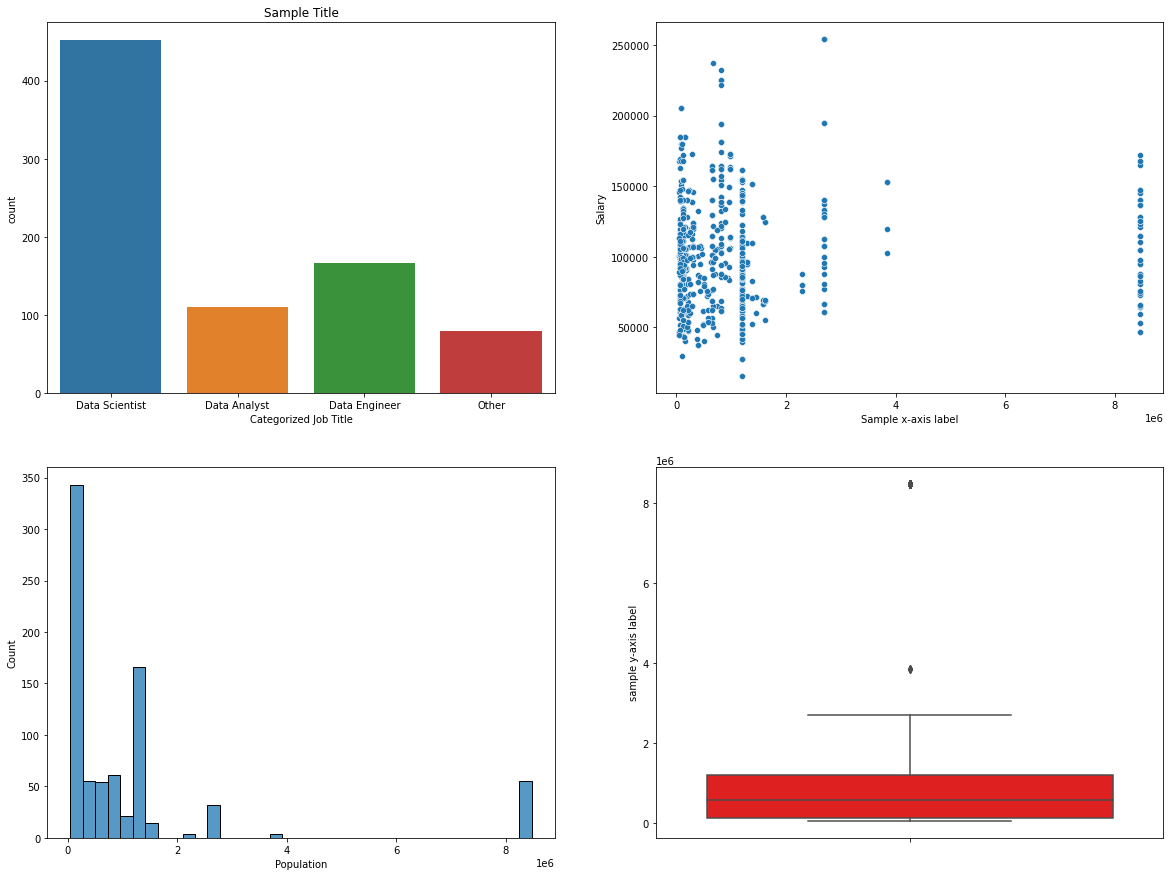

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,15)) #Create subplots, manipulate plot size. nrows is the number of rows, ncols is the number of columns, figsize is the size of subplot

###'''Countplot
sns.countplot(data=df3, x='Categorized Job Title', ax=ax[0,0]) #ax is used to define the position of the plot in the subplot

###'''Scatterplot
sns.scatterplot(data=df3, x='Population', y='Salary', ax=ax[0,1])

###'''Histogram
sns.histplot(data=df3,x='Population', ax=ax[1,0])

###'''Boxplot
sns.boxplot(data=df3, y='Population',ax=ax[1,1], color='red')

###'''Manipulating Titles and Labels
ax[0,0].set_title('Sample Title')
ax[0,1].set_xlabel('Sample x-axis label')
ax[1,1].set_ylabel('sample y-axis label')

plt.show() #Not neccessary in VSCode of Jupyter notebook, but other Python environment may need this in order to show the graphs, so it's better to just have this in all code. 

### Data Values Manipulation

In [120]:
###'''Visualizing datatypes and null values each column contains'''
df3.info()
#df.columns
###'''Imputation (Replace null data with something or removing it completely)'''


<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population             809 non-null    float64
 1   Salary                 809 non-null    float64
 2   Categorized Job Title  809 non-null    object 
dtypes: float64(2), object(1)
memory usage: 25.3+ KB


### Splitting Data For Testing and Training

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df_encoded = pd.get_dummies(df3)

#model = RandomForestClassifier()
model = LinearRegression()
#model = RandomForestRegressor()

y=np.array(df_encoded['Salary']).reshape(-1,1)
x=np.array(df_encoded.drop(columns={"Salary"}))

#GridsearchCV
from sklearn.model_selection import GridSearchCV

#Pipeline
from sklearn.pipeline import Pipeline


xtrain, xtest, ytrain, ytest = train_test_split(x, y)
model.fit(xtrain, ytrain.ravel())
pred=model.predict(xtest)
print(mean_squared_error(pred, ytest, squared=False))


30595.695006645277


### Predicting Target Variable Using Trained Model

In [122]:
data= {
          'Population':[df2.loc[df2['Location']=='Boston']['Population'].item()]
          }
user_df = pd.DataFrame(data)


user_df['Data Analyst'] = 0
user_df['Data Engineer'] = 0
user_df['Data Scientist'] = 1
user_df['Other'] = 0

user_data = user_df['Population'].values.reshape(-1, 1)

user_df['Salary Prediction'] = model.predict(user_df)
user_df[['Population','Salary Prediction']]

c:\Users\billg\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Population,Salary Prediction
0,654776,107160.400302
